# Takes raw matched catalogue and fixes columns, adds in var. etc.

In [1]:
# Call the relevant python packages
%matplotlib inline
import math
import random
import numpy as np
import pandas as pd
import glob, os
import nway
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from astropy import units as u
from astropy.io import ascii, fits
from astropy.table import join, hstack, Table, Column, vstack
from astropy.coordinates import Angle, Latitude, Longitude, SkyCoord

# Set colour palette & plot layouts
import seaborn as sns     #; sns.set()
sns.set_context("paper")   # "paper", "notebook", "talk", "poster"

# Rename horrible column names

In [52]:
# Make sure the N/A flag is 9999 in the below file
file = 'final_cats/1_rmax_&_point2_pos_orig.csv'
data = ascii.read(file, data_start=1)
#print(data.colnames)

# Label sources with ID number
data['ID']=0
for i in range(len(data)):
    data['ID'][i]=i+1

# A list of all the current column names we want to change and include in the final table
old_cols=['S1_1_3_4_ID', 'S1_1_3_4_S1_1_3_S1_F1_RA', 'S1_1_3_4_S1_1_3_S1_F1_DEC', 'S1_1_3_4_S1_1_3_S1_F1_MAG1_1',
          'S1_1_3_4_S1_1_3_S1_F1_ERR1_1', 'S1_1_3_4_S1_1_3_S1_F3_ID', 'S1_1_3_4_S1_1_3_S1_F3_RA',
          'S1_1_3_4_S1_1_3_S1_F3_DEC', 'S1_1_3_4_S1_1_3_S1_F3_MAG1_3', 'S1_1_3_4_S1_1_3_S1_F3_ERR1_3',
          'S1_1_3_4_S1_1_3_Separation_S1_F3_S1_F1', 'S1_1_3_4_S1_1_3_p_any', 'S1_1_3_4_S1_1_3_p_i',
          'S1_1_3_4_S1_F4_ID', 'S1_1_3_4_S1_F4_RA', 'S1_1_3_4_S1_F4_DEC', 'S1_1_3_4_S1_F4_MAG1_4',
          'S1_1_3_4_S1_F4_ERR1_4', 'S1_1_3_4_Separation_S1_F4_S1_1_3', 'S1_1_3_4_p_any', 'S1_1_3_4_p_i',
          'S1_1_3_4_asn', 'S1_1_3_4_RA', 'S1_1_3_4_DEC',
          'S2_1_3_4_ID', 'S2_1_3_4_S2_1_3_S2_F1_RA', 'S2_1_3_4_S2_1_3_S2_F1_DEC', 'S2_1_3_4_S2_1_3_S2_F1_MAG2_1',
          'S2_1_3_4_S2_1_3_S2_F1_ERR2_1', 'S2_1_3_4_S2_1_3_S2_F3_ID', 'S2_1_3_4_S2_1_3_S2_F3_RA',
          'S2_1_3_4_S2_1_3_S2_F3_DEC', 'S2_1_3_4_S2_1_3_S2_F3_MAG2_3', 'S2_1_3_4_S2_1_3_S2_F3_ERR2_3',
          'S2_1_3_4_S2_1_3_Separation_S2_F3_S2_F1', 'S2_1_3_4_S2_1_3_p_any', 'S2_1_3_4_S2_1_3_p_i',
          'S2_1_3_4_S2_F4_ID', 'S2_1_3_4_S2_F4_RA', 'S2_1_3_4_S2_F4_DEC', 'S2_1_3_4_S2_F4_MAG2_4',
          'S2_1_3_4_S2_F4_ERR2_4', 'S2_1_3_4_Separation_S2_F4_S2_1_3', 'S2_1_3_4_p_any', 'S2_1_3_4_p_i',
          'S2_1_3_4_asn', 'S2_1_3_4_RA', 'S2_1_3_4_DEC',
          'Separation_S2_1_3_4_S1_1_3_4', 'p_any', 'p_i', 'total_asn', 'mean_RA', 'mean_DEC']

# A list of all the new column names we want, corresponding to the list above
new_cols=['ID_36_1','RA_36_1','Dec_36_1','mag_36_1',
          'mag_err_36_1','ID_36_3','RA_36_3',
          'Dec_36_3','mag_36_3','mag_err_36_3',
          'sep_36_1_3','p_any_36_1_3','p_i_36_1_3',
          'ID_36_4','RA_36_4','Dec_36_4','mag_36_4',
          'mag_err_36_4','sep_36_1&3_4','p_any_36_1&3_4','p_i_36_1&3_4',
          '36_associations','mean_RA_36','mean_Dec_36',
          'ID_45_1','RA_45_1','Dec_45_1','mag_45_1',
          'mag_err_45_1','ID_45_3','RA_45_3',
          'Dec_45_3','mag_45_3','mag_err_45_3',
          'sep_45_1_3','p_any_45_1_3','p_i_45_1_3',
          'ID_45_4','RA_45_4','Dec_45_4','mag_45_4',
          'mag_err_45_4','sep_45_1&3_4','p_any_45_1&3_4','p_i_45_1&3_4',
          '45_associations','mean_RA_45','mean_Dec_45',
          'sep_mean_36_mean_45','p_any_36_45','p_i_36_45','total_associations','RA','Dec',
          'ID']

# Rename each column
for i in range(len(old_cols)):
    old_column = old_cols[i]
    new_column = new_cols[i]
    data.rename_column(old_column,new_column)

# Order columns in a sensible order
all_cols=['ID','RA','Dec','total_associations',
          'ID_36_1','RA_36_1','Dec_36_1','mag_36_1','mag_err_36_1',
          'ID_36_3','RA_36_3','Dec_36_3','mag_36_3','mag_err_36_3',
          'sep_36_1_3','p_any_36_1_3','p_i_36_1_3',
          'ID_36_4','RA_36_4','Dec_36_4','mag_36_4','mag_err_36_4',
          'sep_36_1&3_4','p_any_36_1&3_4','p_i_36_1&3_4',
          '36_associations',
          'ID_45_1','RA_45_1','Dec_45_1','mag_45_1','mag_err_45_1',
          'ID_45_3','RA_45_3','Dec_45_3','mag_45_3','mag_err_45_3',
          'sep_45_1_3','p_any_45_1_3','p_i_45_1_3',
          'ID_45_4','RA_45_4','Dec_45_4','mag_45_4','mag_err_45_4',
          'sep_45_1&3_4','p_any_45_1&3_4','p_i_45_1&3_4',
          '45_associations',
          'sep_mean_36_mean_45','p_any_36_45','p_i_36_45']

new_data = data[all_cols]

ascii.write(new_data, 'final_cats/secondary_cat_columns.csv',format='csv')

# Read in new csv with sensible column names

In [2]:
# Import data
second_file = 'final_cats/secondary_cat_columns.csv'
second_data = ascii.read(second_file, data_start=1)

# Find bad magnitude errors for both filters

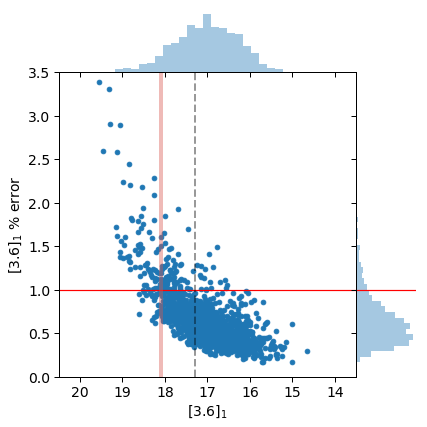

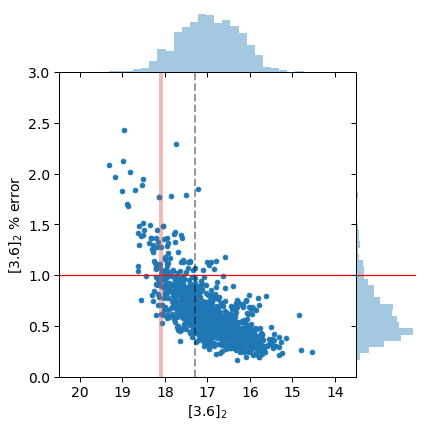

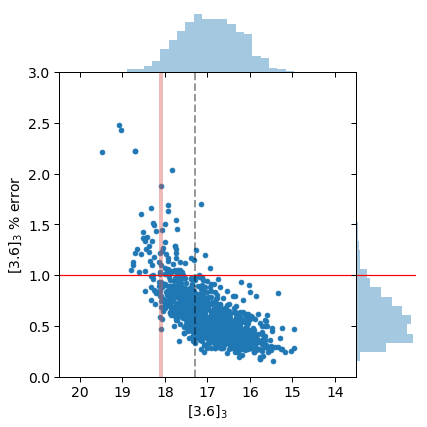

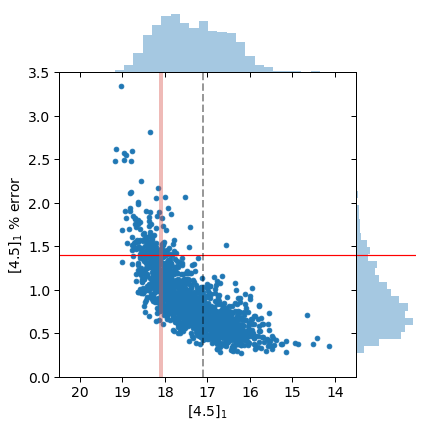

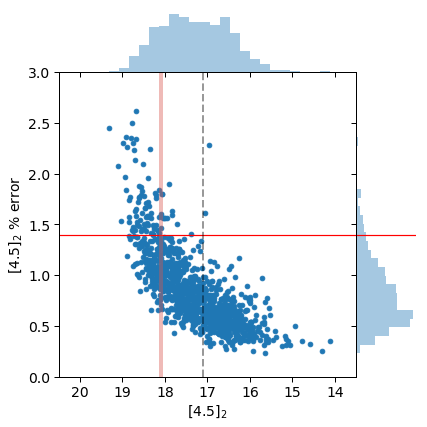

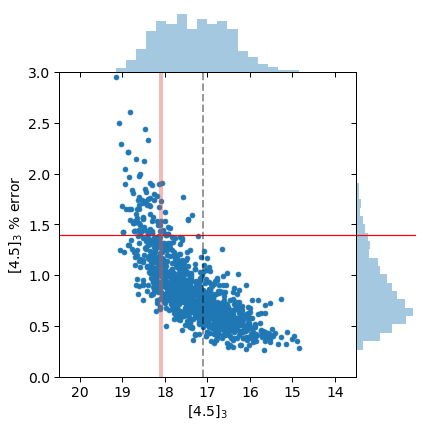

In [5]:
# Consider spread of magnitude errors
# NB: the factor of 2 in the percentage represents that the mag errors have not yet been multiplied by 2!

good_36_1_idx = np.where((second_data['mag_36_1']!=-99))
# Setting up figure
plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=11)
bbb = sns.jointplot(second_data['mag_36_1'][good_36_1_idx],2*100*second_data['mag_err_36_1'][good_36_1_idx]/second_data['mag_36_1'][good_36_1_idx], kind="scatter",
                   space=0)
bbb.set_axis_labels("[3.6]$_1$","[3.6]$_1$ % error")
bbb.ax_joint.axhline(y=1,color='red')
plt.axhline(y=1,color='red')
bbb.ax_joint.axvline(x=-6.3+24.4, color=sns.xkcd_rgb["pale red"], linestyle='-', alpha=0.4, linewidth=4,label='TRGB')
bbb.ax_joint.axvline(x=17.3, color=sns.xkcd_rgb["black"], linestyle='--', alpha=0.4, linewidth=2)
bbb.ax_marg_x.set_xlim(20.5,13.5)
bbb.ax_marg_y.set_ylim(0,3.5)
plt.savefig("fixing/M32_err_36_1.pdf", bbox_inches='tight')

good_36_3_idx = np.where((second_data['mag_36_3']!=-99))
# Setting up figure
plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=11)
bbb = sns.jointplot(second_data['mag_36_3'][good_36_3_idx],2*100*second_data['mag_err_36_3'][good_36_3_idx]/second_data['mag_36_3'][good_36_3_idx], kind="scatter",
                   space=0)
bbb.set_axis_labels("[3.6]$_2$","[3.6]$_2$ % error")
bbb.ax_joint.axhline(y=1,color='red')
plt.axhline(y=1,color='red')
bbb.ax_joint.axvline(x=-6.3+24.4, color=sns.xkcd_rgb["pale red"], linestyle='-', alpha=0.4, linewidth=4,label='TRGB')
bbb.ax_joint.axvline(x=17.3, color=sns.xkcd_rgb["black"], linestyle='--', alpha=0.4, linewidth=2)
bbb.ax_marg_x.set_xlim(20.5,13.5)
bbb.ax_marg_y.set_ylim(0,3)
plt.savefig("fixing/M32_err_36_3.pdf", bbox_inches='tight')

good_36_4_idx = np.where((second_data['mag_36_4']!=-99))
# Setting up figure
plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=11)
bbb = sns.jointplot(second_data['mag_36_4'][good_36_4_idx],2*100*second_data['mag_err_36_4'][good_36_4_idx]/second_data['mag_36_4'][good_36_4_idx], kind="scatter",
                   space=0)
bbb.set_axis_labels("[3.6]$_3$","[3.6]$_3$ % error")
bbb.ax_joint.axhline(y=1,color='red')
plt.axhline(y=1,color='red')
bbb.ax_joint.axvline(x=-6.3+24.4, color=sns.xkcd_rgb["pale red"], linestyle='-', alpha=0.4, linewidth=4,label='TRGB')
bbb.ax_joint.axvline(x=17.3, color=sns.xkcd_rgb["black"], linestyle='--', alpha=0.4, linewidth=2)
bbb.ax_marg_x.set_xlim(20.5,13.5)
bbb.ax_marg_y.set_ylim(0,3)
plt.savefig("fixing/M32_err_36_4.pdf", bbox_inches='tight')



good_45_1_idx = np.where((second_data['mag_45_1']!=-99))
# Setting up figure
plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=11)
bbb = sns.jointplot(second_data['mag_45_1'][good_45_1_idx],2*100*second_data['mag_err_45_1'][good_45_1_idx]/second_data['mag_45_1'][good_45_1_idx], kind="scatter",
                   space=0)
bbb.set_axis_labels("[4.5]$_1$","[4.5]$_1$ % error")
bbb.ax_joint.axhline(y=1.4,color='red')
plt.axhline(y=1.4,color='red')
bbb.ax_joint.axvline(x=-6.3+24.4, color=sns.xkcd_rgb["pale red"], linestyle='-', alpha=0.4, linewidth=4,label='TRGB')
bbb.ax_joint.axvline(x=17.1, color=sns.xkcd_rgb["black"], linestyle='--', alpha=0.4, linewidth=2)
bbb.ax_marg_x.set_xlim(20.5,13.5)
bbb.ax_marg_y.set_ylim(0,3.5)
plt.savefig("fixing/M32_err_45_1.pdf", bbox_inches='tight')


good_45_3_idx = np.where((second_data['mag_45_3']!=-99))
# Setting up figure
plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=11)
bbb = sns.jointplot(second_data['mag_45_3'][good_45_3_idx],2*100*second_data['mag_err_45_3'][good_45_3_idx]/second_data['mag_45_3'][good_45_3_idx], kind="scatter",
                   space=0)
bbb.set_axis_labels("[4.5]$_2$","[4.5]$_2$ % error")
bbb.ax_joint.axhline(y=1.4,color='red')
plt.axhline(y=1.4,color='red')
bbb.ax_joint.axvline(x=-6.3+24.4, color=sns.xkcd_rgb["pale red"], linestyle='-', alpha=0.4, linewidth=4,label='TRGB')
bbb.ax_joint.axvline(x=17.1, color=sns.xkcd_rgb["black"], linestyle='--', alpha=0.4, linewidth=2)
bbb.ax_marg_x.set_xlim(20.5,13.5)
bbb.ax_marg_y.set_ylim(0,3)
plt.savefig("fixing/M32_err_45_3.pdf", bbox_inches='tight')


good_45_4_idx = np.where((second_data['mag_45_4']!=-99))
# Setting up figure
plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("axes", labelsize=14)
plt.rc("legend", fontsize=11)
bbb = sns.jointplot(second_data['mag_45_4'][good_45_4_idx],2*100*second_data['mag_err_45_4'][good_45_4_idx]/second_data['mag_45_4'][good_45_4_idx], kind="scatter",
                   space=0)
bbb.set_axis_labels("[4.5]$_3$","[4.5]$_3$ % error")
bbb.ax_joint.axhline(y=1.4,color='red')
plt.axhline(y=1.4,color='red')
bbb.ax_joint.axvline(x=-6.3+24.4, color=sns.xkcd_rgb["pale red"], linestyle='-', alpha=0.4, linewidth=4,label='TRGB')
bbb.ax_joint.axvline(x=17.1, color=sns.xkcd_rgb["black"], linestyle='--', alpha=0.4, linewidth=2)
bbb.ax_marg_x.set_xlim(20.5,13.5)
bbb.ax_marg_y.set_ylim(0,3)
plt.savefig("fixing/M32_err_45_4.pdf", bbox_inches='tight')


In [80]:
# Find how much data would be left if you culled sources above the red line
good_mag_error_36_1_idx = np.where((2*100*second_data['mag_err_36_1']/second_data['mag_36_1'])<1)
print("% left after culling these (36_1): ",100*len(good_mag_error_36_1_idx[0])/len(second_data[good_36_1_idx]))
good_mag_error_36_3_idx = np.where((2*100*second_data['mag_err_36_3']/second_data['mag_36_3'])<1)
print("% left after culling these (36_3): ",100*len(good_mag_error_36_3_idx[0])/len(second_data[good_36_3_idx]))
good_mag_error_36_4_idx = np.where((2*100*second_data['mag_err_36_4']/second_data['mag_36_4'])<1)
print("% left after culling these (36_4): ",100*len(good_mag_error_36_4_idx[0])/len(second_data[good_36_4_idx]))
print("average % for 36: ",((len(good_mag_error_36_1_idx[0])/len(second_data[good_36_1_idx]))+
                            (len(good_mag_error_36_3_idx[0])/len(second_data[good_36_3_idx]))+
                            (len(good_mag_error_36_4_idx[0])/len(second_data[good_36_4_idx])))*100/3)

good_mag_error_45_1_idx = np.where((2*100*second_data['mag_err_45_1']/second_data['mag_45_1'])<1.4)
print("% left after culling these (45_1): ",100*len(good_mag_error_45_1_idx[0])/len(second_data[good_45_1_idx]))
good_mag_error_45_3_idx = np.where((2*100*second_data['mag_err_45_3']/second_data['mag_45_3'])<1.4)
print("% left after culling these (45_3): ",100*len(good_mag_error_45_3_idx[0])/len(second_data[good_45_3_idx]))
good_mag_error_45_4_idx = np.where((2*100*second_data['mag_err_45_4']/second_data['mag_45_4'])<1.4)
print("% left after culling these (45_4): ",100*len(good_mag_error_45_4_idx[0])/len(second_data[good_45_4_idx]))
print("average % for 45: ",((len(good_mag_error_45_1_idx[0])/len(second_data[good_45_1_idx]))+
                            (len(good_mag_error_45_3_idx[0])/len(second_data[good_45_3_idx]))+
                            (len(good_mag_error_45_4_idx[0])/len(second_data[good_45_4_idx])))*100/3)
print("These average percentages should be almost equal to ensure no bias between filters")

% left after culling these (36_1):  88.53640951694304
% left after culling these (36_3):  90.93432007400556
% left after culling these (36_4):  92.27974568574024
average % for 36:  90.58349175889627
% left after culling these (45_1):  90.48305695746215
% left after culling these (45_3):  92.26086956521739
% left after culling these (45_4):  91.37630662020906
average % for 45:  91.37341104762953
These average percentages should be almost equal to ensure no bias between filters


# Now reduce catalogue based upon mag errors above and edge effects

Number of initial sources:  1387
Initial numbers on bad mag errors:
Now number of bad mag data for 36_1 is  159
Now number of bad mag data for 36_3 is  98
Now number of bad mag data for 36_4 is  85
Now number of bad mag data for 45_1 is  132
Now number of bad mag data for 45_3 is  89
Now number of bad mag data for 45_4 is  99
Final numbers on bad mag errors:
Now number of bad mag data for 36_1 is  0
Now number of bad mag data for 36_3 is  0
Now number of bad mag data for 36_4 is  0
Now number of bad mag data for 45_1 is  0
Now number of bad mag data for 45_3 is  0
Now number of bad mag data for 45_4 is  0
Initial numbers of edge affected sources in each epoch:
The number of E1 edge affected sources (check on CMD in M32_CMD_CCD) 19
The number of E3 edge affected sources (check on CMD in M32_CMD_CCD) 10
The number of E4 edge affected sources (check on CMD in M32_CMD_CCD) 11
Final numbers of edge affected sources in each epoch:
The number of E1 edge affected sources (check on CMD in M32_C

idx,ID,RA,Dec,total_associations,ID_36_1,RA_36_1,Dec_36_1,mag_36_1,mag_err_36_1,ID_36_3,RA_36_3,Dec_36_3,mag_36_3,mag_err_36_3,sep_36_1_3,p_any_36_1_3,p_i_36_1_3,ID_36_4,RA_36_4,Dec_36_4,mag_36_4,mag_err_36_4,sep_36_1&3_4,p_any_36_1&3_4,p_i_36_1&3_4,36_associations,ID_45_1,RA_45_1,Dec_45_1,mag_45_1,mag_err_45_1,ID_45_3,RA_45_3,Dec_45_3,mag_45_3,mag_err_45_3,sep_45_1_3,p_any_45_1_3,p_i_45_1_3,ID_45_4,RA_45_4,Dec_45_4,mag_45_4,mag_err_45_4,sep_45_1&3_4,p_any_45_1&3_4,p_i_45_1&3_4,45_associations,sep_mean_36_mean_45,p_any_36_45,p_i_36_45,mean_RA_36,mean_Dec_36,mean_RA_45,mean_Dec_45,good_source?
0,1,10.605697221666667,40.8625387,6,1,10.60573757,40.8624973,17.52850491,0.1112,1646,10.60563612,40.86244107,17.95750491,0.1038,0.3424452,0.94459933,1.0,4044,10.60565694,40.86250859,17.45050491,0.1462,0.16356307,0.9681216,1.0,3,8589,10.60579079,40.86263217,17.95555224,0.1702,336,10.60573609,40.86260594,18.27255224,0.2014,0.17634009,0.9644841,1.0,10831,10.60562582,40.86254713,18.77055224,0.236,0.4554494,0.93720776,0.6032849,3,0.42078134,0.9294558,1.0,10.605676876666667,40.86248232,10.605717566666668,40.86259508,1
1,3,10.598679168333334,40.876865808333335,5,8,10.5987445,40.87681039,16.89650491,0.0892,373,10.59869237,40.87683363,16.93250491,0.096,0.1647272,0.96768904,1.0,2097,10.59867896,40.87682893,16.77250491,0.0976,0.110302,0.97081816,1.0,3,3252,10.59870879,40.87689628,17.22155224,0.0912,-99,-99.0,-99.0,-99.0,-99.0,-99.0,0.0,0.0,11700,10.59859733,40.87691832,18.28955224,0.2458,0.3136,0.9468245,1.0,2,0.33082917,0.9526155,1.0,10.598705276666667,40.876824316666664,10.59865306,40.8769073,1
2,4,10.6913973125,40.913498305000005,4,13,10.69142492,40.91351227,17.13150491,0.1026,-99,-99.0,-99.0,-99.0,-99.0,-99.0,0.0,0.0,1181,10.69136772,40.91347144,17.14050491,0.1044,0.21405855,0.9642311,1.0,2,5231,10.69147417,40.91352131,17.35855224,0.1484,-99,-99.0,-99.0,-99.0,-99.0,-99.0,0.0,0.0,2269,10.69132244,40.9134882,17.36655224,0.138,0.42964908,0.9121707,1.0,2,0.046752926,0.975188,1.0,10.691396319999999,40.913491855000004,10.691398305,40.913504755000005,1


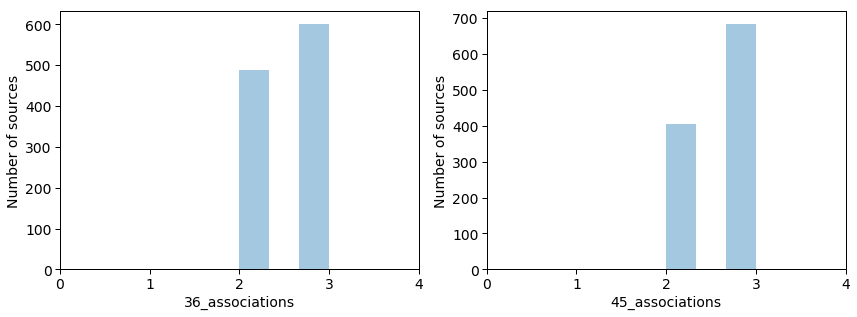

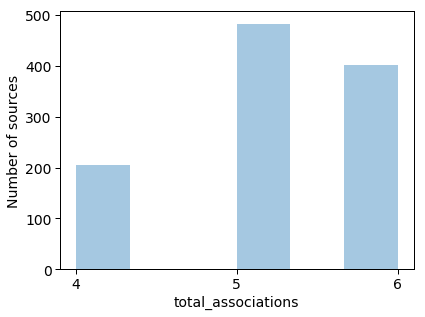

In [122]:
# Read in data again to make sure changes happen only once
second_file = 'final_cats/secondary_cat_columns.csv'
second_data = ascii.read(second_file, data_start=1)

# Multiply magnitude errors by 2
#NB: if error is already -99 then it will be left alone
for i in range(len(second_data)):
    if second_data['mag_err_36_1'][i]!=-99:
        second_data['mag_err_36_1'][i]=second_data['mag_err_36_1'][i]*2
    if second_data['mag_err_36_3'][i]!=-99:
        second_data['mag_err_36_3'][i]=second_data['mag_err_36_3'][i]*2
    if second_data['mag_err_36_4'][i]!=-99:
        second_data['mag_err_36_4'][i]=second_data['mag_err_36_4'][i]*2
    if second_data['mag_err_45_1'][i]!=-99:
        second_data['mag_err_45_1'][i]=second_data['mag_err_45_1'][i]*2
    if second_data['mag_err_45_3'][i]!=-99:
        second_data['mag_err_45_3'][i]=second_data['mag_err_45_3'][i]*2
    if second_data['mag_err_45_4'][i]!=-99:
        second_data['mag_err_45_4'][i]=second_data['mag_err_45_4'][i]*2

#################################################################################################################
# Find where mag errors are large and set all their properties to -99
print("Number of initial sources: ",len(second_data))
# Find where sources are not bad data (-99) but have a large mag error

print("Initial numbers on bad mag errors:")
bad_36_1_idx=np.where((second_data['mag_36_1']!=-99)&((100*second_data['mag_err_36_1']/second_data['mag_36_1'])>1))
print("Now number of bad mag data for 36_1 is ",len(bad_36_1_idx[0]))
bad_36_3_idx=np.where((second_data['mag_36_3']!=-99)&((100*second_data['mag_err_36_3']/second_data['mag_36_3'])>1))
print("Now number of bad mag data for 36_3 is ",len(bad_36_3_idx[0]))
bad_36_4_idx=np.where((second_data['mag_36_4']!=-99)&((100*second_data['mag_err_36_4']/second_data['mag_36_4'])>1))
print("Now number of bad mag data for 36_4 is ",len(bad_36_4_idx[0]))
bad_45_1_idx=np.where((second_data['mag_45_1']!=-99)&((100*second_data['mag_err_45_1']/second_data['mag_45_1'])>1.4))
print("Now number of bad mag data for 45_1 is ",len(bad_45_1_idx[0]))
bad_45_3_idx=np.where((second_data['mag_45_3']!=-99)&((100*second_data['mag_err_45_3']/second_data['mag_45_3'])>1.4))
print("Now number of bad mag data for 45_3 is ",len(bad_45_3_idx[0]))
bad_45_4_idx=np.where((second_data['mag_45_4']!=-99)&((100*second_data['mag_err_45_4']/second_data['mag_45_4'])>1.4))
print("Now number of bad mag data for 45_4 is ",len(bad_45_4_idx[0]))

for i in range(len(second_data)):
    if ((second_data['mag_36_1'][i]!=-99)&((100*second_data['mag_err_36_1'][i]/second_data['mag_36_1'][i])>1)):
        second_data['ID_36_1'][i]=-99
        second_data['RA_36_1'][i]=-99
        second_data['Dec_36_1'][i]=-99
        second_data['mag_36_1'][i]=-99
        second_data['mag_err_36_1'][i]=-99
    if ((second_data['mag_36_3'][i]!=-99)&((100*second_data['mag_err_36_3'][i]/second_data['mag_36_3'][i])>1)):
        second_data['ID_36_3'][i]=-99
        second_data['RA_36_3'][i]=-99
        second_data['Dec_36_3'][i]=-99
        second_data['mag_36_3'][i]=-99
        second_data['mag_err_36_3'][i]=-99
    if ((second_data['mag_36_4'][i]!=-99)&((100*second_data['mag_err_36_4'][i]/second_data['mag_36_4'][i])>1)):
        second_data['ID_36_4'][i]=-99
        second_data['RA_36_4'][i]=-99
        second_data['Dec_36_4'][i]=-99
        second_data['mag_36_4'][i]=-99
        second_data['mag_err_36_4'][i]=-99
    if ((second_data['mag_45_1'][i]!=-99)&((100*second_data['mag_err_45_1'][i]/second_data['mag_45_1'][i])>1.4)):
        second_data['ID_45_1'][i]=-99
        second_data['RA_45_1'][i]=-99
        second_data['Dec_45_1'][i]=-99
        second_data['mag_45_1'][i]=-99
        second_data['mag_err_45_1'][i]=-99
    if ((second_data['mag_45_3'][i]!=-99)&((100*second_data['mag_err_45_3'][i]/second_data['mag_45_3'][i])>1.4)):
        second_data['ID_45_3'][i]=-99
        second_data['RA_45_3'][i]=-99
        second_data['Dec_45_3'][i]=-99
        second_data['mag_45_3'][i]=-99
        second_data['mag_err_45_3'][i]=-99
    if ((second_data['mag_45_4'][i]!=-99)&((100*second_data['mag_err_45_4'][i]/second_data['mag_45_4'][i])>1.4)):
        second_data['ID_45_4'][i]=-99
        second_data['RA_45_4'][i]=-99
        second_data['Dec_45_4'][i]=-99
        second_data['mag_45_4'][i]=-99
        second_data['mag_err_45_4'][i]=-99

print("Final numbers on bad mag errors:")
bad_36_1_idx=np.where((second_data['mag_36_1']!=-99)&((100*second_data['mag_err_36_1']/second_data['mag_36_1'])>1))
print("Now number of bad mag data for 36_1 is ",len(bad_36_1_idx[0]))
bad_36_3_idx=np.where((second_data['mag_36_3']!=-99)&((100*second_data['mag_err_36_3']/second_data['mag_36_3'])>1))
print("Now number of bad mag data for 36_3 is ",len(bad_36_3_idx[0]))
bad_36_4_idx=np.where((second_data['mag_36_4']!=-99)&((100*second_data['mag_err_36_4']/second_data['mag_36_4'])>1))
print("Now number of bad mag data for 36_4 is ",len(bad_36_4_idx[0]))
bad_45_1_idx=np.where((second_data['mag_45_1']!=-99)&((100*second_data['mag_err_45_1']/second_data['mag_45_1'])>1.4))
print("Now number of bad mag data for 45_1 is ",len(bad_45_1_idx[0]))
bad_45_3_idx=np.where((second_data['mag_45_3']!=-99)&((100*second_data['mag_err_45_3']/second_data['mag_45_3'])>1.4))
print("Now number of bad mag data for 45_3 is ",len(bad_45_3_idx[0]))
bad_45_4_idx=np.where((second_data['mag_45_4']!=-99)&((100*second_data['mag_err_45_4']/second_data['mag_45_4'])>1.4))
print("Now number of bad mag data for 45_4 is ",len(bad_45_4_idx[0]))
#################################################################################################################

# Now cull sources with a colour less than -1.6 in each epoch as these are edge affected sources.
# Make sure already only sources with good data are included in this because:
# If only one of the sources is bad then it won't show up on the CMD anyway and;
# If both sources are bad then we can ignore it anyway

print("Initial numbers of edge affected sources in each epoch:")
edge_E1_idx=np.where(((second_data['mag_36_1']-second_data['mag_45_1'])<-1.6) &
                     (second_data['mag_36_1']!=-99) & (second_data['mag_45_1']!=-99))
print("The number of E1 edge affected sources (check on CMD in M32_CMD_CCD)",len(edge_E1_idx[0]))
edge_E3_idx=np.where(((second_data['mag_36_3']-second_data['mag_45_3'])<-1.6) &
                     (second_data['mag_36_3']!=-99) & (second_data['mag_45_3']!=-99))
print("The number of E3 edge affected sources (check on CMD in M32_CMD_CCD)",len(edge_E3_idx[0]))
edge_E4_idx=np.where(((second_data['mag_36_4']-second_data['mag_45_4'])<-1.6) &
                     (second_data['mag_36_4']!=-99) & (second_data['mag_45_4']!=-99))
print("The number of E4 edge affected sources (check on CMD in M32_CMD_CCD)",len(edge_E4_idx[0]))

for i in range(len(second_data)):
    if (((second_data['mag_36_1'][i]-second_data['mag_45_1'][i])<-1.6) &
        (second_data['mag_36_1'][i]!=-99) & (second_data['mag_45_1'][i]!=-99)):
        second_data['ID_36_1'][i]=-99
        second_data['RA_36_1'][i]=-99
        second_data['Dec_36_1'][i]=-99
        second_data['mag_36_1'][i]=-99
        second_data['mag_err_36_1'][i]=-99
        second_data['ID_45_1'][i]=-99
        second_data['RA_45_1'][i]=-99
        second_data['Dec_45_1'][i]=-99
        second_data['mag_45_1'][i]=-99
        second_data['mag_err_45_1'][i]=-99
    if (((second_data['mag_36_3'][i]-second_data['mag_45_3'][i])<-1.6) &
        (second_data['mag_36_3'][i]!=-99) & (second_data['mag_45_3'][i]!=-99)):
        second_data['ID_36_3'][i]=-99
        second_data['RA_36_3'][i]=-99
        second_data['Dec_36_3'][i]=-99
        second_data['mag_36_3'][i]=-99
        second_data['mag_err_36_3'][i]=-99
        second_data['ID_45_3'][i]=-99
        second_data['RA_45_3'][i]=-99
        second_data['Dec_45_3'][i]=-99
        second_data['mag_45_3'][i]=-99
        second_data['mag_err_45_3'][i]=-99
    if (((second_data['mag_36_4'][i]-second_data['mag_45_4'][i])<-1.6) &
        (second_data['mag_36_4'][i]!=-99) & (second_data['mag_45_4'][i]!=-99)):
        second_data['ID_36_4'][i]=-99
        second_data['RA_36_4'][i]=-99
        second_data['Dec_36_4'][i]=-99
        second_data['mag_36_4'][i]=-99
        second_data['mag_err_36_4'][i]=-99
        second_data['ID_45_4'][i]=-99
        second_data['RA_45_4'][i]=-99
        second_data['Dec_45_4'][i]=-99
        second_data['mag_45_4'][i]=-99
        second_data['mag_err_45_4'][i]=-99
        
print("Final numbers of edge affected sources in each epoch:")
edge_E1_idx=np.where(((second_data['mag_36_1']-second_data['mag_45_1'])<-1.6) &
                     (second_data['mag_36_1']!=-99) & (second_data['mag_45_1']!=-99))
print("The number of E1 edge affected sources (check on CMD in M32_CMD_CCD)",len(edge_E1_idx[0]))
edge_E3_idx=np.where(((second_data['mag_36_3']-second_data['mag_45_3'])<-1.6) &
                     (second_data['mag_36_3']!=-99) & (second_data['mag_45_3']!=-99))
print("The number of E3 edge affected sources (check on CMD in M32_CMD_CCD)",len(edge_E3_idx[0]))
edge_E4_idx=np.where(((second_data['mag_36_4']-second_data['mag_45_4'])<-1.6) &
                     (second_data['mag_36_4']!=-99) & (second_data['mag_45_4']!=-99))
print("The number of E4 edge affected sources (check on CMD in M32_CMD_CCD)",len(edge_E4_idx[0]))
###################################################################################################################

# Now recalculate meanRA_lambda, meanDec_lambda, 36/45 associations
second_data['mean_RA_36']=0.0
second_data['mean_Dec_36']=0.0
second_data['mean_RA_45']=0.0
second_data['mean_Dec_45']=0.0
for i in range(len(second_data)): #for each source in the catalogue
    asn_36 = 0
    RA_36 = 0.0
    DEC_36 = 0.0
    if second_data['mag_36_1'][i]!=-99:
        asn_36 += 1
        RA_36 = RA_36 + second_data['RA_36_1'][i]
        DEC_36 = DEC_36 + second_data['Dec_36_1'][i]
    if second_data['mag_36_3'][i]!=-99:
        asn_36 += 1
        RA_36 = RA_36 + second_data['RA_36_3'][i]
        DEC_36 = DEC_36 + second_data['Dec_36_3'][i]
    if second_data['mag_36_4'][i]!=-99:
        asn_36 += 1
        RA_36 = RA_36 + second_data['RA_36_4'][i]
        DEC_36 = DEC_36 + second_data['Dec_36_4'][i]
    second_data['36_associations'][i]=asn_36 #set total 36 asn
    if asn_36!=0:
        second_data['mean_RA_36'][i]=RA_36/asn_36 # DIVIDE BY ZERO ISSUE?
        second_data['mean_Dec_36'][i]=DEC_36/asn_36 # DIVIDE BY ZERO ISSUE?
    else:
        second_data['mean_RA_36'][i]=-99
        second_data['mean_Dec_36'][i]=-99
    asn_45 = 0
    RA_45 = 0.0
    DEC_45 = 0.0
    if second_data['mag_45_1'][i]!=-99:
        asn_45 += 1
        RA_45 = RA_45 + second_data['RA_45_1'][i]
        DEC_45 = DEC_45 + second_data['Dec_45_1'][i]
    if second_data['mag_45_3'][i]!=-99:
        asn_45 += 1
        RA_45 = RA_45 + second_data['RA_45_3'][i]
        DEC_45 = DEC_45 + second_data['Dec_45_3'][i]
    if second_data['mag_45_4'][i]!=-99:
        asn_45 += 1
        RA_45 = RA_45 + second_data['RA_45_4'][i]
        DEC_45 = DEC_45 + second_data['Dec_45_4'][i]
    second_data['45_associations'][i]=asn_45 #set total 36 asn
    if asn_45!=0:
        second_data['mean_RA_45'][i]=RA_45/asn_45 # DIVIDE BY ZERO ISSUE?
        second_data['mean_Dec_45'][i]=DEC_45/asn_45 # DIVIDE BY ZERO ISSUE?
    else:
        second_data['mean_RA_45'][i]=-99
        second_data['mean_Dec_45'][i]=-99
    
#second_data[0:3].show_in_notebook()

# Use this line to check to see if any show up as having < 2 of each of the filter associations
oh_dear_idx = np.where((second_data['45_associations']<2)|(second_data['36_associations']<2))
print("Those with less than 2 of the 36 OR 45 associations",len(oh_dear_idx[0]))

# Now cull those with asn_lambda < 2
second_data['good_source?']=1
for i in range(len(second_data)):
    if ((second_data['36_associations'][i]<2)|(second_data['45_associations'][i]<2)):
        second_data['good_source?'][i]=0
good_source_idx = np.where(second_data['good_source?']==1)
good_data=second_data[good_source_idx]
print("Number of good sources: ",len(good_data))

ig = plt.figure(figsize=(12,4.5))
plt.subplot(1,2,1)
ax = sns.distplot(good_data['36_associations'] ,kde=False, bins=3)
#ax = sns.countplot(pr_data[param_best_name], color='steelblue')
#ax.set_yscale('log')
ax.set_ylabel('Number of sources')
plt.tight_layout()
ax.set_xticks([0,1,2,3,4])
plt.subplot(1,2,2)
ax = sns.distplot(good_data['45_associations'] ,kde=False, bins=3)
#ax = sns.countplot(pr_data[param_best_name], color='steelblue')
#ax.set_yscale('log')
ax.set_ylabel('Number of sources')
plt.tight_layout()
ax.set_xticks([0,1,2,3,4])


# Then find total_asn & mean coordinates and do histogram
for i in range(len(good_data)):
    good_data['total_associations'][i]=good_data['36_associations'][i]+good_data['45_associations'][i]
    good_data['RA'][i] = (good_data['mean_RA_36'][i]+good_data['mean_RA_45'][i])/2
    good_data['Dec'][i] = (good_data['mean_Dec_36'][i]+good_data['mean_Dec_45'][i])/2
    
ig = plt.figure(figsize=(6,4.5))
ax = sns.distplot(good_data['total_associations'] ,kde=False, bins=6)
#ax = sns.countplot(pr_data[param_best_name], color='steelblue')
#ax.set_yscale('log')
ax.set_ylabel('Number of sources')
plt.tight_layout()
ax.set_xticks([4,5,6])

idx_5_asn = np.where(good_data['total_associations']==5)
print("Those with 5 associations: ",len(idx_5_asn[0]))


good_data[0:3].show_in_notebook()
#second_data[0:5].show_in_notebook()

# Find fluxes, amplitudes, means, variabilities etc.

In [131]:
# Set up empty columns which will be filled with calculated results below
good_data['flux_36_1']=float(-99)
good_data['flux_36_3']=float(-99)
good_data['flux_36_4']=float(-99)
good_data['flux_45_1']=float(-99)
good_data['flux_45_3']=float(-99)
good_data['flux_45_4']=float(-99)
good_data['flux_err_36_1']=float(-99)
good_data['flux_err_36_3']=float(-99)
good_data['flux_err_36_4']=float(-99)
good_data['flux_err_45_1']=float(-99)
good_data['flux_err_45_3']=float(-99)
good_data['flux_err_45_4']=float(-99)
good_data['var_36_1_3']=float(-99)
good_data['var_36_1_3_abs']=float(-99)
good_data['var_36_1_4']=float(-99)
good_data['var_36_1_4_abs']=float(-99)
good_data['var_36_3_4']=float(-99)
good_data['var_36_3_4_abs']=float(-99)
good_data['var_45_1_3']=float(-99)
good_data['var_45_1_3_abs']=float(-99)
good_data['var_45_1_4']=float(-99)
good_data['var_45_1_4_abs']=float(-99)
good_data['var_45_3_4']=float(-99)
good_data['var_45_3_4_abs']=float(-99)
good_data['mean_mag_36']=0.0
good_data['mean_mag_45']=0.0
good_data['amp_36']=0.0
good_data['amp_45']=0.0

#########################################################################################################################
################################################# F L U X ###############################################################
#########################################################################################################################

# Hardcode zero points of filters for Vega system.
# Fluxes and their errors are given in mJy
F_0_36, F_0_err_36, m_0_36 = 280900, 4100, 0.0
F_0_45, F_0_err_45, m_0_45 = 179700, 2600, 0.0

# Define lists for fluxes and their errors for each filter
flux_list_36 = ['flux_36_1','flux_36_3','flux_36_4']
flux_err_list_36 = ['flux_err_36_1','flux_err_36_3','flux_err_36_4']
flux_list_45 = ['flux_45_1','flux_45_3','flux_45_4']
flux_err_list_45 = ['flux_err_45_1','flux_err_45_3','flux_err_45_4']

# Find where sensible magnitude data is and make lists of the indices for each filter
good_mag_36_1_idx = np.where(good_data['mag_36_1']!=-99)
good_mag_36_3_idx = np.where(good_data['mag_36_3']!=-99)
good_mag_36_4_idx = np.where(good_data['mag_36_4']!=-99)
good_mag_45_1_idx = np.where(good_data['mag_45_1']!=-99)
good_mag_45_3_idx = np.where(good_data['mag_45_3']!=-99)
good_mag_45_4_idx = np.where(good_data['mag_45_4']!=-99)
good_idx_list_36 = [good_mag_36_1_idx,good_mag_36_3_idx,good_mag_36_4_idx]
good_idx_list_45 = [good_mag_45_1_idx,good_mag_45_3_idx,good_mag_45_4_idx]

# Write fluxes and flux errors for each epoch and each filter
# NB: flux is in mJy
for i in range(len(flux_list_36)):
    flux_name = flux_list_36[i]
    flux_err_name = flux_err_list_36[i]
    mag_name = mag_list_36[i]
    mag_err_name = mag_err_list_36[i]
    idx = good_idx_list_36[i]
    good_data[flux_name][idx]=F_0_36*np.power(10,0.4*(m_0_36-good_data[mag_name][idx]))
    good_data[flux_err_name][idx]=(np.log(10)/2.5)*good_data[mag_err_name][idx]*good_data[flux_name][idx]
for i in range(len(flux_list_45)):
    flux_name = flux_list_45[i]
    flux_err_name = flux_err_list_45[i]
    mag_name = mag_list_45[i]
    mag_err_name = mag_err_list_45[i]
    idx = good_idx_list_45[i]
    good_data[flux_name][idx]=F_0_45*np.power(10,0.4*(m_0_45-good_data[mag_name][idx]))
    good_data[flux_err_name][idx]=(np.log(10)/2.5)*good_data[mag_err_name][idx]*good_data[flux_name][idx]
    
#########################################################################################################################
################################################# VARIABILITY ###########################################################
#########################################################################################################################

# For variability, find where both epochs in question have sensible magnitude data and calculate var. indices (V)
good_36_1_3_idx = np.where((good_data['mag_36_1']!=-99) & (good_data['mag_36_3']!=-99))
error_36_1_3 = np.power((np.power(good_data['flux_err_36_1'][good_36_1_3_idx],2)+np.power(good_data['flux_err_36_3'][good_36_1_3_idx],2)),0.5)
good_data['var_36_1_3'][good_36_1_3_idx] = ((good_data['flux_36_1'][good_36_1_3_idx]-good_data['flux_36_3'][good_36_1_3_idx])/error_36_1_3)
good_data['var_36_1_3_abs'][good_36_1_3_idx] = abs((good_data['flux_36_1'][good_36_1_3_idx]-good_data['flux_36_3'][good_36_1_3_idx])/error_36_1_3)

good_36_1_4_idx = np.where((good_data['mag_36_1']!=-99) & (good_data['mag_36_4']!=-99))
error_36_1_4 = np.power((np.power(good_data['flux_err_36_1'][good_36_1_4_idx],2)+np.power(good_data['flux_err_36_4'][good_36_1_4_idx],2)),0.5)
good_data['var_36_1_4'][good_36_1_4_idx] = ((good_data['flux_36_1'][good_36_1_4_idx]-good_data['flux_36_4'][good_36_1_4_idx])/error_36_1_4)
good_data['var_36_1_4_abs'][good_36_1_4_idx] = abs((good_data['flux_36_1'][good_36_1_4_idx]-good_data['flux_36_4'][good_36_1_4_idx])/error_36_1_4)

good_36_3_4_idx = np.where((good_data['mag_36_3']!=-99) & (good_data['mag_36_4']!=-99))
error_36_3_4 = np.power((np.power(good_data['flux_err_36_3'][good_36_3_4_idx],2)+np.power(good_data['flux_err_36_4'][good_36_3_4_idx],2)),0.5)
good_data['var_36_3_4'][good_36_3_4_idx] = ((good_data['flux_36_3'][good_36_3_4_idx]-good_data['flux_36_4'][good_36_3_4_idx])/error_36_3_4)
good_data['var_36_3_4_abs'][good_36_3_4_idx] = abs((good_data['flux_36_3'][good_36_3_4_idx]-good_data['flux_36_4'][good_36_3_4_idx])/error_36_3_4)

good_45_1_3_idx = np.where((good_data['mag_45_1']!=-99) & (good_data['mag_45_3']!=-99))
error_45_1_3 = np.power((np.power(good_data['flux_err_45_1'][good_45_1_3_idx],2)+np.power(good_data['flux_err_45_3'][good_45_1_3_idx],2)),0.5)
good_data['var_45_1_3'][good_45_1_3_idx] = ((good_data['flux_45_1'][good_45_1_3_idx]-good_data['flux_45_3'][good_45_1_3_idx])/error_45_1_3)
good_data['var_45_1_3_abs'][good_45_1_3_idx] = abs((good_data['flux_45_1'][good_45_1_3_idx]-good_data['flux_45_3'][good_45_1_3_idx])/error_45_1_3)

good_45_1_4_idx = np.where((good_data['mag_45_1']!=-99) & (good_data['mag_45_4']!=-99))
error_45_1_4 = np.power((np.power(good_data['flux_err_45_1'][good_45_1_4_idx],2)+np.power(good_data['flux_err_45_4'][good_45_1_4_idx],2)),0.5)
good_data['var_45_1_4'][good_45_1_4_idx] = ((good_data['flux_45_1'][good_45_1_4_idx]-good_data['flux_45_4'][good_45_1_4_idx])/error_45_1_4)
good_data['var_45_1_4_abs'][good_45_1_4_idx] = abs((good_data['flux_45_1'][good_45_1_4_idx]-good_data['flux_45_4'][good_45_1_4_idx])/error_45_1_4)

good_45_3_4_idx = np.where((good_data['mag_45_3']!=-99) & (good_data['mag_45_4']!=-99))
error_45_3_4 = np.power((np.power(good_data['flux_err_45_3'][good_45_3_4_idx],2)+np.power(good_data['flux_err_45_4'][good_45_3_4_idx],2)),0.5)
good_data['var_45_3_4'][good_45_3_4_idx] = ((good_data['flux_45_3'][good_45_3_4_idx]-good_data['flux_45_4'][good_45_3_4_idx])/error_45_3_4)
good_data['var_45_3_4_abs'][good_45_3_4_idx] = abs((good_data['flux_45_3'][good_45_3_4_idx]-good_data['flux_45_4'][good_45_3_4_idx])/error_45_3_4)

#########################################################################################################################
############################################# MEANS & AMPLITUDES ########################################################
#########################################################################################################################

for i in range(len(good_data)):
    mag_list = np.array([])
    if good_data['mag_36_1'][i]!=-99:
        mag_list = np.append(mag_list,good_data['mag_36_1'][i])
    if good_data['mag_36_3'][i]!=-99:
        mag_list = np.append(mag_list,good_data['mag_36_3'][i])
    if good_data['mag_36_4'][i]!=-99:
        mag_list = np.append(mag_list,good_data['mag_36_4'][i])
    max_mag = np.amax(mag_list)
    min_mag = np.amin(mag_list)
    mean_mag = np.mean(mag_list)
    good_data['amp_36'][i] = max_mag-min_mag
    good_data['mean_mag_36'][i] = mean_mag
    
    mag_list = np.array([])
    if good_data['mag_45_1'][i]!=-99:
        mag_list = np.append(mag_list,good_data['mag_45_1'][i])
    if good_data['mag_45_3'][i]!=-99:
        mag_list = np.append(mag_list,good_data['mag_45_3'][i])
    if good_data['mag_45_4'][i]!=-99:
        mag_list = np.append(mag_list,good_data['mag_45_4'][i])
    max_mag = np.amax(mag_list)
    min_mag = np.amin(mag_list)
    mean_mag = np.mean(mag_list)
    good_data['amp_45'][i] = max_mag-min_mag
    good_data['mean_mag_45'][i] = mean_mag
    

good_data[0:3].show_in_notebook()
ascii.write(good_data,'good_data.csv',format='csv')

# Look at spread of amplitudes

0.18286251145737847
0.19118592545081484
0.24441246562786434
0.19526347893486046


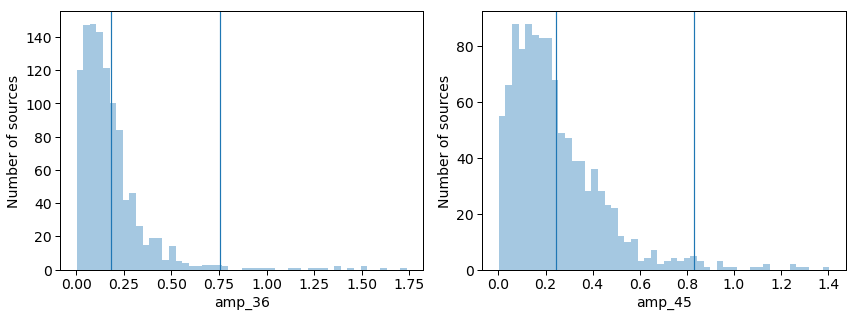

In [140]:
ig = plt.figure(figsize=(12,4.5))
plt.subplot(1,2,1)
ax = sns.distplot(good_data['amp_36'] ,kde=False, bins=50)
mean = np.nanmean(good_data['amp_36'])
std = np.nanstd(good_data['amp_36'])
print(mean)
print(std)
plt.axvline(x=np.nanmean(good_data['amp_36']))
plt.axvline(x=mean+3*std)
#ax = sns.countplot(pr_data[param_best_name], color='steelblue')
#ax.set_yscale('log')
ax.set_ylabel('Number of sources')
plt.tight_layout()
#ax.set_xticks([4,5,6])
#save_name = str('hist_'+param_best_name+'.pdf')
#plt.savefig(save_name, bbox_inches='tight')

plt.subplot(1,2,2)
ax = sns.distplot(good_data['amp_45'] ,kde=False, bins=50)
mean = np.nanmean(good_data['amp_45'])
std = np.nanstd(good_data['amp_45'])
print(mean)
print(std)
plt.axvline(x=np.nanmean(good_data['amp_45']))
plt.axvline(x=mean+3*std)
#ax = sns.countplot(pr_good_data[param_best_name], color='steelblue')
#ax.set_yscale('log')
ax.set_ylabel('Number of sources')
plt.tight_layout()
#ax.set_xticks([4,5,6])
#save_name = str('hist_'+param_best_name+'.pdf')
#plt.savefig(save_name, bbox_inches='tight')

# Table format shown in paper

In [ ]:
formatted_cols=['ID','RA','Dec',
                'mag_36_1','mag_err_36_1','mag_36_2','mag_err_36_2',
                'mag_36_3','mag_err_36_3','mag_36_4','mag_err_36_4',
                'mag_45_1','mag_err_45_1','mag_45_2','mag_err_45_2',
                'mag_45_3','mag_err_45_3','mag_45_4','mag_err_45_4',
                'total_associations'
          'sep_36_1&3_4','p_any_36_1&3_4','p_i_36_1&3_4',
          '36_associations',
          'ID_45_1','RA_45_1','Dec_45_1',,
          'ID_45_3','RA_45_3','Dec_45_3','mag_45_3','mag_err_45_3',
          'sep_45_1_3','p_any_45_1_3','p_i_45_1_3',
          'ID_45_4','RA_45_4','Dec_45_4','mag_45_4','mag_err_45_4',
          'sep_45_1&3_4','p_any_45_1&3_4','p_i_45_1&3_4',
          '45_associations',
          'sep_mean_36_mean_45','p_any_36_45','p_i_36_45']

new_data['mag_36_2']=9999
new_data['mag_45_2']=9999
new_data['mag_err_36_2']=9999
new_data['mag_err_45_2']=9999

formatted_data = new_data[formatted_cols]
formatted_data.rename_column('total_associations','Nepochs')

In [2]:
def deg2HMS(ra='', dec='', round=False):
    RA, DEC, rs, ds = '', '', '', ''
    if dec:
        if str(dec)[0] == '-':
            ds, dec = '-', abs(dec)
        deg = int(dec)
        deg1 = str(deg)
        decM = abs(int((dec-deg)*60))
        decM1 = str(decM)
        if round:
            decS = int((abs((dec-deg)*60)-decM)*60)
        else:
            decS = (abs((dec-deg)*60)-decM)*60
        decS1 = str(decS)
        DEC = str(ds)+deg1+':'+decM1+':'+decS1
        #DEC = '{0}{1} {2} {3}'.format(ds, deg, decM, decS)
  
    if ra:
        if str(ra)[0] == '-':
            rs, ra = '-', abs(ra)
        raH = int(ra/15)
        raH1 = str(raH)
        raM = int(((ra/15)-raH)*60)
        raM1 = str(raM)
        if round:
            raS = int(((((ra/15)-raH)*60)-raM)*60)
        else:
            raS = ((((ra/15)-raH)*60)-raM)*60
        raS1 = str(raS)
        RA = str(rs)+raH1+':'+raM1+':'+raS1
        #RA = '{0}{1} {2} {3}'.format(rs, raH1, raM1, raS1)
  
    if ra and dec:
        return (RA, DEC)
    else:
        return RA or DEC

In [3]:
RA = 30
RA = deg2HMS(ra=RA)
#RA = str(RA)
#RA = str(RA[0]) + ":" + str(RA[1]) + ":" + str(RA[2])
print(RA)

Dec = 45.75
Dec = deg2HMS(dec=Dec)
print(Dec)

2:0:0.0
45:45:0.0


In [8]:
for i in range(len(new_data)):
    RA = new_data['RA'][i]
    RA = deg2HMS(ra=RA)
    new_data['RA'][i] = RA
    DEC = new_data['Dec'][i]
    DEC = deg2HMS(dec=DEC)
    new_data['Dec'][i] = DEC
    
new_data[0:3].show_in_notebook()

ValueError: could not convert string to float: '0:42:25.367333200007636'